In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [26]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['00'], img_size=(150,50))

completed load sequence 00 data


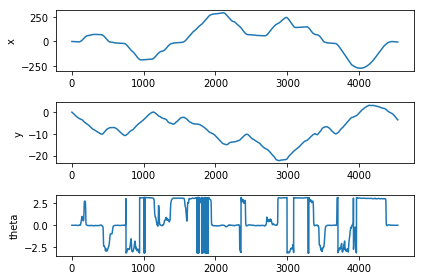

In [27]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['00'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

In [28]:
inputs, velocities = kitti_data.load_data_input_model()

In [29]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/15)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

#mean_image = np.mean(X_train, axis = 0)
#std_image = np.std(X_train, axis = 0)

# Normalizing X
#X_train = X_train - mean_image
#X_val = X_val - mean_image
#X_train /= std_image
#X_val /= std_image
#X_train = X_train.astype(np.float32)
#X_val = X_val.astype(np.float32)


# Normalizing y
#mean_y = np.mean(y_train, axis = 0)
#std_y = np.std(y_train, axis = 0)
#y_train = y_train - mean_y
#y_val = y_val - mean_y
#y_train /= std_y
#y_val /=std_y

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(4238, 50, 150, 6)
(4238, 2)
(302, 50, 150, 6)
(302, 2)


In [30]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.001,
         seed=235,
         learning_rate=1e-5,
         epoch=50,
         batch_size=150,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.001
seed=235
learning_rate=1e-05
number of batches for training: 28
epoch 1 
Best validation error! iteration:1 valid_error: 0.894232451915741
Best validation error! iteration:2 valid_error: 0.7522542476654053
Best validation error! iteration:3 valid_error: 0.6941331624984741
Best validation error! iteration:4 valid_error: 0.6937413215637207
Best validation error! iteration:5 valid_error: 0.6430957317352295
Best validation error! iteration:8 valid_error: 0.6411272287368774
Best validation error! iteration:14 valid_error: 0.6358862519264221
Best validation error! iteration:18 valid_error: 0.6312383413314819
Best validation error! iteration:19 valid_error: 0.6305806040763855
Best validation error! iteration:20 valid_error: 0.6283180117607117
Best validation error! iteration:21 valid_error: 0.621059775352478
Best validation error! iteratio

epoch 43 
epoch 44 
epoch 45 
Best validation error! iteration:1245 valid_error: 0.2365715056657791
epoch 46 
epoch 47 
Best validation error! iteration:1303 valid_error: 0.236085906624794
epoch 48 
epoch 49 
Best validation error! iteration:1364 valid_error: 0.23580129444599152
epoch 50 
Traning ends. The best valid mse is 0.24088217318058014. Model named CNN_Velocity_Model.


In [31]:
from deep_visual_odometry.input_model import test_input_model
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


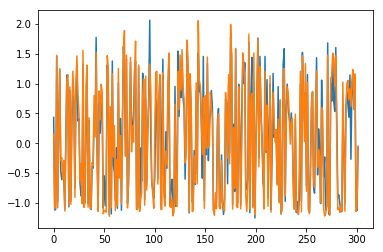

In [32]:
plt.plot(out[:,0])
plt.plot(y_val[:,0])

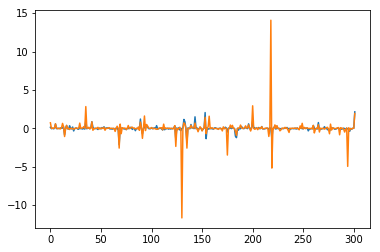

In [33]:
plt.plot(out[:,1])
plt.plot(y_val[:,1])

In [21]:
# error = out-y_val
# print(f'recalculated validation mse is {np.linalg.norm(error)/num_validation}')
# print(f'validation mse if the rotational part is ignored {np.linalg.norm(error[:,0])/num_validation}')

In [22]:
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


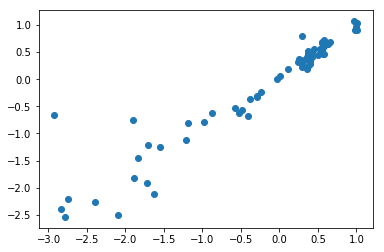

In [23]:
plt.scatter(y_val[:,0],out[:,0])
plt.show()

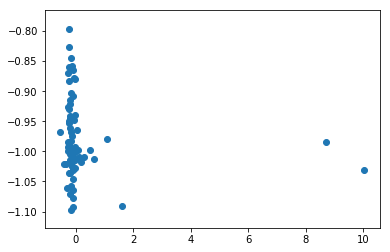

In [12]:
plt.scatter(y_val[:,1],out[:,1])
plt.show()

In [13]:
out[:,1]

array([-0.96066153, -0.9681933 , -0.9029162 , -0.91414416, -1.0169505 ,
       -0.988744  , -1.0046513 , -0.94568247, -1.024788  , -1.0359684 ,
       -0.9925599 , -0.99708265, -1.0304258 , -0.7959972 , -0.98427176,
       -1.0059325 , -1.0316738 , -1.0967522 , -0.8456086 , -0.9270729 ,
       -1.0146832 , -0.85885584, -1.0004232 , -0.95012   , -0.9652295 ,
       -0.9798099 , -1.0213668 , -0.9990233 , -0.85982037, -0.9527496 ,
       -0.9680795 , -1.0927901 , -1.0113811 , -0.93013823, -0.982186  ,
       -0.983815  , -1.0638372 , -1.0460967 , -0.87764156, -1.0048834 ,
       -0.9083011 , -1.020724  , -1.0769094 , -1.0366588 , -1.060173  ,
       -0.9401804 , -0.8271924 , -1.0274309 , -1.0236839 , -1.0575998 ,
       -1.0180438 , -0.94661915, -0.99732286, -1.0098174 , -0.88022375,
       -0.9921232 , -0.88371325, -0.9970102 , -0.86956954, -0.8646002 ,
       -1.0272878 , -0.9206393 , -0.9478193 , -1.0124291 , -0.99715084,
       -0.9970812 , -1.070146  , -1.090253  , -0.9746477 , -1.01